# Apple Leave Disease Detection using EfficientNet with Callback

In [1]:
!pip install opencv-python

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/38.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/38.8 MB 1.4 MB/s eta 0:00:29
   ---------------------------------------- 0.3/38.8 MB 4.0 MB/s eta 0:00:10
    --------------------------------------- 0.7/38.8 MB 6.0 MB/s eta 0:00:07
   - -------------------------------------- 1.2/38.8 MB 8.4 MB/s eta 0:00:05
   - -------------------------------------- 1.8/38.8 MB 9.7 MB/s eta 0:00:04
   -- ------------------------------------- 2.6/38.8 MB 11.9 MB/s eta 0:00:04
   --- ------------------------------------ 3.6/38.8 MB 13.5 MB/s eta 0:00:03
   ---- ----------------------------------- 4.8/38.8 MB 15.3 MB/s eta 0:00:03
   ------ --------------------------------- 6.4/38.8 MB 18.5 MB/s eta 0:00:02
   -------- ------------------------------- 8.2/38.8 MB 21.0 MB/s eta 0:00:02
   ---------- ----------------------------- 10.3/38.8 MB 26.2 MB/s eta 0:00:0

In [2]:
!pip install tensorflow

Defaulting to user installation because normal site-packages is not writeable
     ---------------------------------------- 0.0/48.7 kB ? eta -:--:--
     ---------------------------------------- 48.7/48.7 kB 2.4 MB/s eta 0:00:00
   ---------------------------------------- 0.0/390.2 MB ? eta -:--:--
   ---------------------------------------- 3.2/390.2 MB 68.4 MB/s eta 0:00:06
    --------------------------------------- 8.0/390.2 MB 85.1 MB/s eta 0:00:05
   - ------------------------------------- 12.8/390.2 MB 110.0 MB/s eta 0:00:04
   - ------------------------------------- 17.7/390.2 MB 110.0 MB/s eta 0:00:04
   -- ------------------------------------ 22.5/390.2 MB 129.5 MB/s eta 0:00:03
   -- ------------------------------------ 27.3/390.2 MB 131.2 MB/s eta 0:00:03
   --- ----------------------------------- 32.1/390.2 MB 131.2 MB/s eta 0:00:03
   --- ----------------------------------- 37.0/390.2 MB 108.8 MB/s eta 0:00:04
   ---- ---------------------------------- 41.8/390.2 MB 131.

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


## Load and Prepare the Dataset

In [1]:
import glob
import cv2
import numpy as np

In [2]:
# Initialize lists to hold the images and labels
Apple_Apple_scab = []
Apple_Black_rot = []
Apple_Cedar_apple_rust = []
Apple_healthy = []

# Load apple scab images
for f in glob.iglob("C:/Users/ceagbaraji/Documents/plant_apple/Apple___Apple_scab/*.JPG"):
    img = cv2.imread(f)
    img = cv2.resize(img, (224, 224))
    b, g, r = cv2.split(img)
    img = cv2.merge([r, g, b])
    Apple_Apple_scab.append(img)

# Load apple black rot images
for f in glob.iglob("C:/Users/ceagbaraji/Documents/plant_apple/Apple___Black_rot/*.JPG"):
    img = cv2.imread(f)
    img = cv2.resize(img, (224, 224))
    b, g, r = cv2.split(img)
    img = cv2.merge([r, g, b])
    Apple_Black_rot.append(img)

# Load cedar apple rust images
for f in glob.iglob("C:/Users/ceagbaraji/Documents/plant_apple/Apple___Cedar_apple_rust/*.JPG"):
    img = cv2.imread(f)
    img = cv2.resize(img, (224, 224))
    b, g, r = cv2.split(img)
    img = cv2.merge([r, g, b])
    Apple_Cedar_apple_rust.append(img)

# Load apple healthy images
for f in glob.iglob("C:/Users/ceagbaraji/Documents/plant_apple/Apple___healthy/*.JPG"):
    img = cv2.imread(f)
    img = cv2.resize(img, (224, 224))
    b, g, r = cv2.split(img)
    img = cv2.merge([r, g, b])
    Apple_healthy.append(img)

In [3]:
# Convert lists to numpy arrays
Apple_Apple_scab = np.array(Apple_Apple_scab)
Apple_Black_rot = np.array(Apple_Black_rot)
Apple_Cedar_apple_rust = np.array(Apple_Cedar_apple_rust)
Apple_healthy = np.array(Apple_healthy)
d_s = np.concatenate((Apple_Apple_scab, Apple_Black_rot, Apple_Cedar_apple_rust, Apple_healthy))

In [4]:
Apple_Apple_scab.shape

(630, 224, 224, 3)

In [5]:
Apple_Black_rot.shape

(621, 224, 224, 3)

In [6]:
Apple_Cedar_apple_rust.shape

(275, 224, 224, 3)

In [7]:
Apple_healthy.shape

(989, 224, 224, 3)

In [8]:
d_s.shape

(2515, 224, 224, 3)

In [9]:
np.random.choice(10, 5, replace=False)

array([6, 2, 4, 3, 8])

## Visualize the Dataset

In [10]:
import matplotlib.pyplot as plt
import tensorflow as tf

In [11]:
def plot_random(Apple_Apple_scab, Apple_Black_rot, Apple_Cedar_apple_rust, Apple_healthy, num=5):
    Apple_Apple_scab_imgs = Apple_Apple_scab[np.random.choice(Apple_Apple_scab.shape[0], num, replace=False)]
    Apple_Black_rot_imgs = Apple_Black_rot[np.random.choice(Apple_Black_rot.shape[0], num, replace=False)]
    Apple_Cedar_apple_rust_imgs = Apple_Cedar_apple_rust[np.random.choice(Apple_Cedar_apple_rust.shape[0], num, replace=False)]
    Apple_healthy_imgs = Apple_healthy[np.random.choice(Apple_healthy.shape[0], num, replace=False)]

    plt.figure(figsize=(16,9))
    for i in range(num):
        plt.subplot(1, num, i+1)
        plt.title('Apple Apple scab')
        plt.imshow(Apple_Apple_scab_imgs[i])

    plt.figure(figsize=(16,9))
    for i in range(num):
        plt.subplot(1, num, i+1)
        plt.title('Apple Black rot')
        plt.imshow(Apple_Black_rot_imgs[i])

    plt.figure(figsize=(16,9))
    for i in range(num):
        plt.subplot(1, num, i+1)
        plt.title('Apple Cedar apple rust')
        plt.imshow(Apple_Cedar_apple_rust_imgs[i])

    plt.figure(figsize=(16,9))
    for i in range(num):
        plt.subplot(1, num, i+1)
        plt.title('Apple healthy')
        plt.imshow(Apple_healthy_imgs[i])

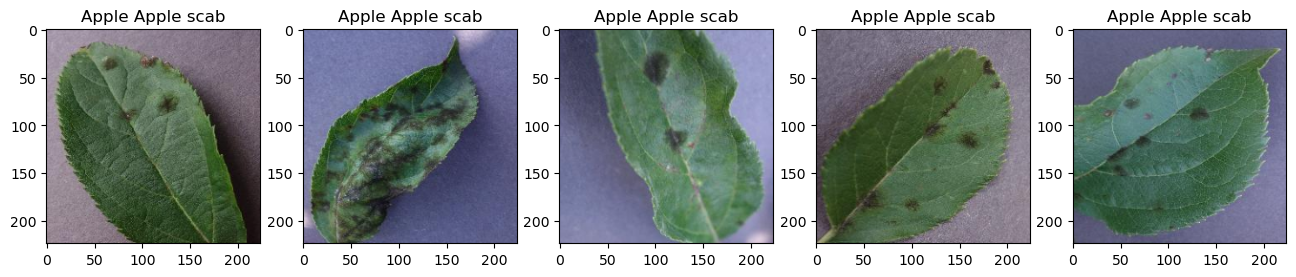

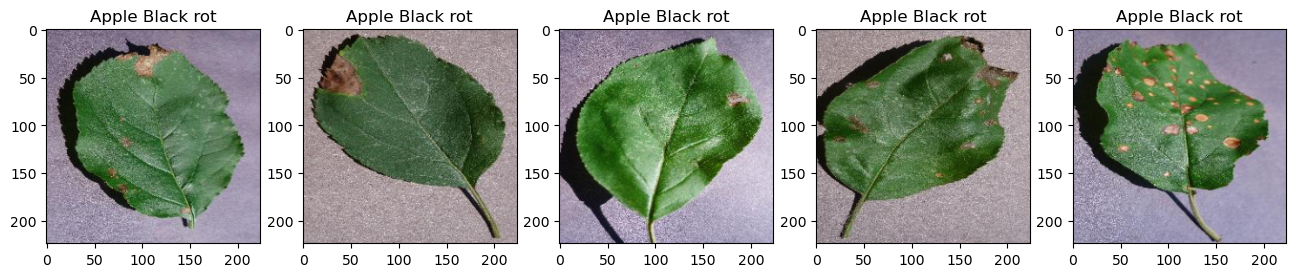

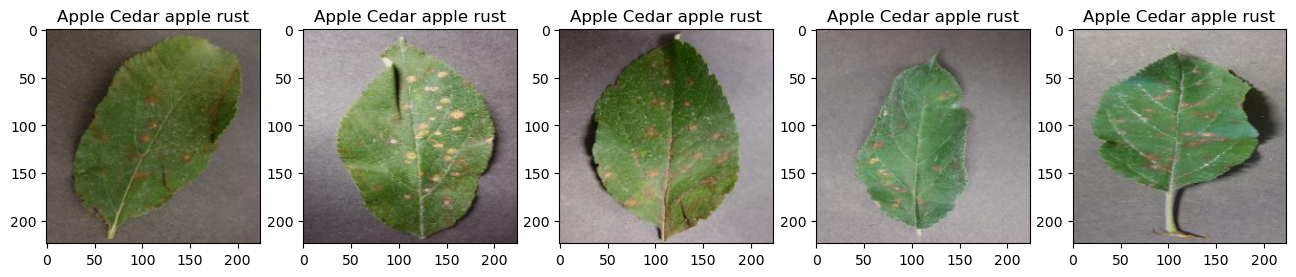

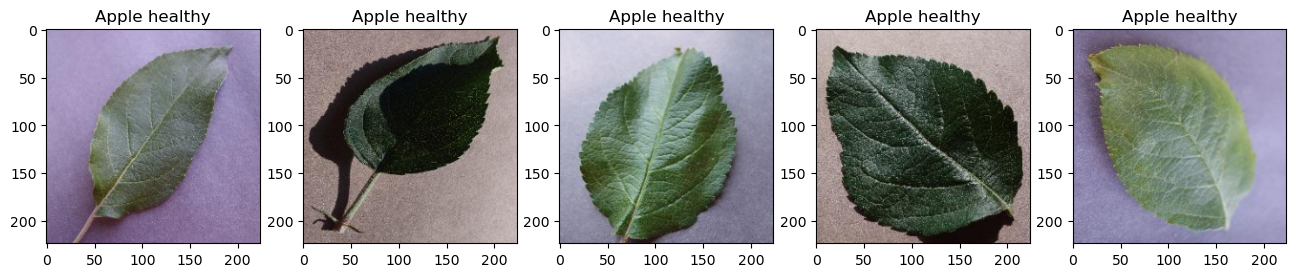

In [12]:
plot_random(Apple_Apple_scab, Apple_Black_rot, Apple_Cedar_apple_rust, Apple_healthy, num=5)

In [13]:
# Prepare labels
Apple_Apple_scab_labels = np.full(len(Apple_Apple_scab), 0)
Apple_Black_rot_labels = np.full(len(Apple_Black_rot), 1)
Apple_Cedar_apple_rust_labels = np.full(len(Apple_Cedar_apple_rust), 2)
Apple_healthy_labels = np.full(len(Apple_healthy), 3)

In [14]:
# Concatenate data and labels
images = np.concatenate((Apple_Apple_scab, Apple_Black_rot, Apple_Cedar_apple_rust, Apple_healthy), axis=0)
labels = np.concatenate((Apple_Apple_scab_labels, Apple_Black_rot_labels, Apple_Cedar_apple_rust_labels, Apple_healthy_labels), axis=0)

In [15]:
# Normalize the data to [0, 1] range
images = images / 255.0

# Split the Dataset

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
# Split the dataset into training and testing sets
train_images, test_images, train_labels, test_labels = train_test_split(images, labels, test_size=0.2, random_state=42)

# Define EfficientNet Model with Untrainable Base

In [18]:
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam

In [19]:
# Load the EfficientNetB0 architecture with pre-trained ImageNet weights
base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the base model's layers to prevent training them initially
base_model.trainable = False

# Add custom layers for multi-class classification
x = base_model.output
x = GlobalAveragePooling2D()(x)  # Global average pooling layer
x = Dense(128, activation='relu')(x)  # Fully connected layer
x = Dropout(0.5)(x)  # Dropout layer for regularization
output = Dense(4, activation='softmax')(x)  # Output layer with 4 neurons for multi-class classification

# Create the final model
model = Model(inputs=base_model.input, outputs=output)

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0000001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Display the model architecture
model.summary()

16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)      │ (None, 224, 224, 3)       │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ rescaling (Rescaling)         │ (None, 224, 224, 3)       │               0 │ input_layer[0][0]          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ normalization (Normalization) │ (None, 224, 224, 3)       │               7 │ rescaling[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ rescaling_1 (Rescaling)       │ (None, 224, 224, 3)       │               0 │ normalization[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ stem_conv_pad (ZeroPadding2D) │ (None, 225, 225, 3)       │               0 │ rescaling_1[0][0]          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ stem_conv (Conv2D)            │ (None, 112, 112, 32)      │             864 │ stem_conv_pad[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ stem_bn (BatchNormalization)  │ (None, 112, 112, 32)      │             128 │ stem_conv[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ stem_activation (Activation)  │ (None, 112, 112, 32)      │               0 │ stem_bn[0][0]              │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block1a_dwconv                │ (None, 112, 112, 32)      │             288 │ stem_activation[0][0]      │
│ (DepthwiseConv2D)             │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block1a_bn                    │ (None, 112, 112, 32)      │             128 │ block1a_dwconv[0][0]       │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block1a_activation            │ (None, 112, 112, 32)      │               0 │ block1a_bn[0][0]           │
│ (Activation)                  │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block1a_se_squeeze            │ (None, 32)                │               0 │ block1a_activation[0][0]   │
│ (GlobalAveragePooling2D)      │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block1a_se_reshape (Reshape)  │ (None, 1, 1, 32)          │               0 │ block1a_se_squeeze[0][0]   │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block1a_se_reduce (Conv2D)    │ (None, 1, 1, 8)           │             264 │ block1a_se_reshape[0][0]   │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block1a_se_expand (Conv2D)    │ (None, 1, 1, 32)          │             288 │ block1a_se_reduce[0][0]    │
├───────────────────────────────┼───────────────────────────┼───────────────

 Total params: 4,214,055 (16.08 MB)

 Trainable params: 164,484 (642.52 KB)

 Non-trainable params: 4,049,571 (15.45 MB)

# Train the EfficientNet Model

In [20]:
# Train the model
history = model.fit(train_images, train_labels, epochs=50, validation_data=(test_images, test_labels), batch_size=32)

Epoch 1/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 23s 252ms/step - accuracy: 0.2871 - loss: 1.3804 - val_accuracy: 0.4056 - val_loss: 1.3467
Epoch 2/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 15s 231ms/step - accuracy: 0.3014 - loss: 1.3740 - val_accuracy: 0.4056 - val_loss: 1.3458
Epoch 3/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 14s 230ms/step - accuracy: 0.3048 - loss: 1.3677 - val_accuracy: 0.4056 - val_loss: 1.3450
Epoch 4/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 14s 217ms/step - accuracy: 0.2718 - loss: 1.3768 - val_accuracy: 0.4056 - val_loss: 1.3442
Epoch 5/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 14s 227ms/step - accuracy: 0.3298 - loss: 1.3679 - val_accuracy: 0.4056 - val_loss: 1.3433
Epoch 6/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 14s 229ms/step - accuracy: 0.2864 - loss: 1.3653 - val_accuracy: 0.4056 - val_loss: 1.3426
Epoch 7/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 14s 228ms/step - accuracy: 0.2851 - loss: 1.3719 - val_accuracy: 0.4056 - val_loss: 1.3418
Epoch 8/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 15s 230ms/step - accuracy: 0.2889 - loss: 1.3659 - val_accu

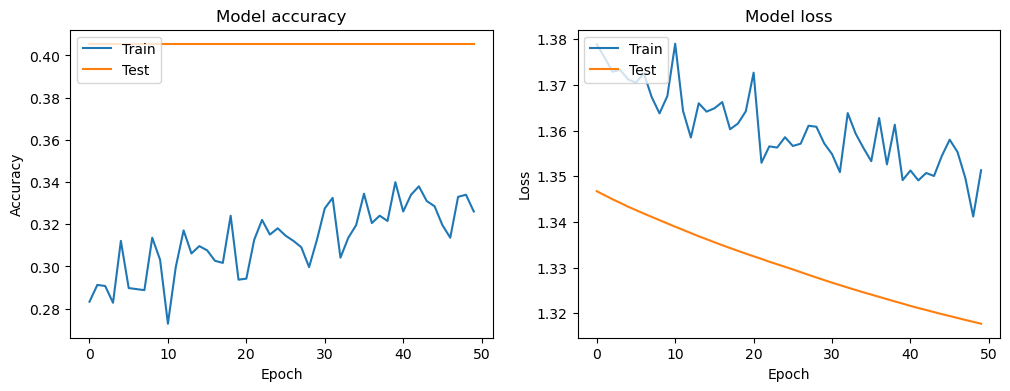

In [21]:
# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.show()

# Evaluate the Model

In [22]:
# Evaluate the model
test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print(f'Test Loss: {test_loss:.4f}')
print(f'Test Accuracy: {test_accuracy:.4f}')

16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 169ms/step - accuracy: 0.4085 - loss: 1.3133
Test Loss: 1.3177
Test Accuracy: 0.4056


In [23]:
# Predict the labels on the test set
pred_labels = np.argmax(model.predict(test_images), axis=1)


16/16 ━━━━━━━━━━━━━━━━━━━━ 6s 260ms/step


In [24]:
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

In [25]:
# Calculate the confusion matrix
cm = confusion_matrix(test_labels, pred_labels)

# Define the class names
class_names = ['Apple_scab', 'Black_rot', 'Cedar_apple_rust', 'healthy']


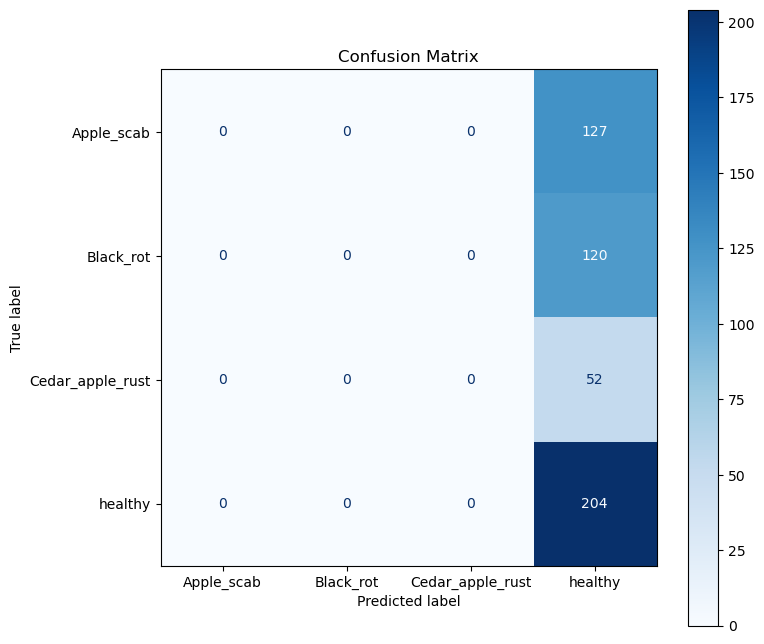

In [26]:
# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)

# Plot the confusion matrix
fig, ax = plt.subplots(figsize=(8, 8))
disp.plot(cmap='Blues', values_format='d', ax=ax, colorbar=True)
plt.grid(False)  # Remove grid lines
plt.title("Confusion Matrix")
plt.show()

In [27]:
# Print a classification report
print(classification_report(test_labels, pred_labels, target_names=class_names))

                  precision    recall  f1-score   support

      Apple_scab       0.00      0.00      0.00       127
       Black_rot       0.00      0.00      0.00       120
Cedar_apple_rust       0.00      0.00      0.00        52
         healthy       0.41      1.00      0.58       204

        accuracy                           0.41       503
       macro avg       0.10      0.25      0.14       503
    weighted avg       0.16      0.41      0.23       503



C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Define EfficientNet Model with Trainable Base

In [28]:
# Load the EfficientNetB0 architecture with pre-trained ImageNet weights
base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the base model's layers to prevent training them initially
base_model.trainable = True

# Add custom layers for multi-class classification
x = base_model.output
x = GlobalAveragePooling2D()(x)  # Global average pooling layer
x = Dense(128, activation='relu')(x)  # Fully connected layer
x = Dropout(0.5)(x)  # Dropout layer for regularization
output = Dense(4, activation='softmax')(x)  # Output layer with 4 neurons for multi-class classification

# Create the final model
model = Model(inputs=base_model.input, outputs=output)

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.00001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Display the model architecture
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)    │ (None, 224, 224, 3)       │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ rescaling_2 (Rescaling)       │ (None, 224, 224, 3)       │               0 │ input_layer_1[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ normalization_1               │ (None, 224, 224, 3)       │               7 │ rescaling_2[0][0]          │
│ (Normalization)               │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ rescaling_3 (Rescaling)       │ (None, 224, 224, 3)       │               0 │ normalization_1[0][0]      │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ stem_conv_pad (ZeroPadding2D) │ (None, 225, 225, 3)       │               0 │ rescaling_3[0][0]          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ stem_conv (Conv2D)            │ (None, 112, 112, 32)      │             864 │ stem_conv_pad[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ stem_bn (BatchNormalization)  │ (None, 112, 112, 32)      │             128 │ stem_conv[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ stem_activation (Activation)  │ (None, 112, 112, 32)      │               0 │ stem_bn[0][0]              │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block1a_dwconv                │ (None, 112, 112, 32)      │             288 │ stem_activation[0][0]      │
│ (DepthwiseConv2D)             │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block1a_bn                    │ (None, 112, 112, 32)      │             128 │ block1a_dwconv[0][0]       │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block1a_activation            │ (None, 112, 112, 32)      │               0 │ block1a_bn[0][0]           │
│ (Activation)                  │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block1a_se_squeeze            │ (None, 32)                │               0 │ block1a_activation[0][0]   │
│ (GlobalAveragePooling2D)      │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block1a_se_reshape (Reshape)  │ (None, 1, 1, 32)          │               0 │ block1a_se_squeeze[0][0]   │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block1a_se_reduce (Conv2D)    │ (None, 1, 1, 8)           │             264 │ block1a_se_reshape[0][0]   │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block1a_se_expand (Conv2D)    │ (None, 1, 1, 32)          │             28

 Total params: 4,214,055 (16.08 MB)

 Trainable params: 4,172,032 (15.92 MB)

 Non-trainable params: 42,023 (164.16 KB)

# Train the EfficientNet Model

In [29]:
# Train the model
history = model.fit(train_images, train_labels, epochs=50, validation_data=(test_images, test_labels), batch_size=32)

Epoch 1/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 96s 1s/step - accuracy: 0.3423 - loss: 1.3621 - val_accuracy: 0.1034 - val_loss: 1.4270
Epoch 2/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 65s 1s/step - accuracy: 0.5108 - loss: 1.1404 - val_accuracy: 0.2386 - val_loss: 1.3813
Epoch 3/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 67s 1s/step - accuracy: 0.6611 - loss: 0.9636 - val_accuracy: 0.4016 - val_loss: 1.3447
Epoch 4/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 66s 1s/step - accuracy: 0.7607 - loss: 0.8136 - val_accuracy: 0.3002 - val_loss: 1.3545
Epoch 5/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 67s 1s/step - accuracy: 0.8278 - loss: 0.6656 - val_accuracy: 0.2863 - val_loss: 1.3805
Epoch 6/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 67s 1s/step - accuracy: 0.8822 - loss: 0.5554 - val_accuracy: 0.1889 - val_loss: 1.4716
Epoch 7/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 67s 1s/step - accuracy: 0.8987 - loss: 0.4608 - val_accuracy: 0.1233 - val_loss: 1.5319
Epoch 8/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 69s 1s/step - accuracy: 0.9217 - loss: 0.3837 - val_accuracy: 0.2724 - val_loss:

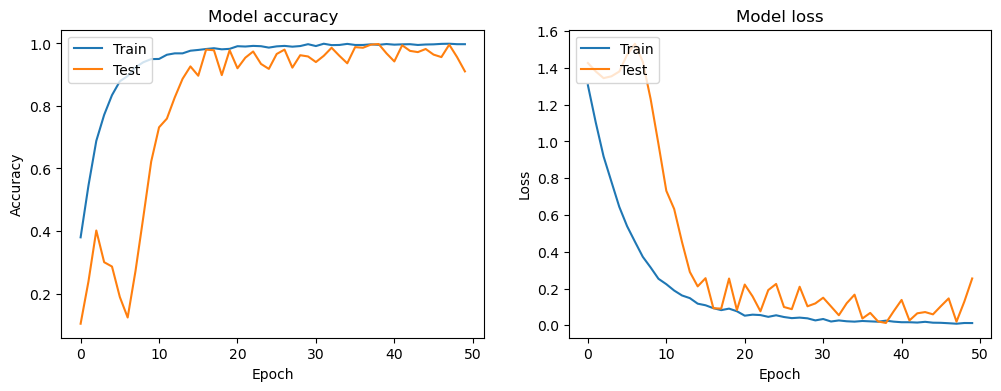

In [30]:
# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.show()

# Evaluate the Model

In [31]:
# Evaluate the model
test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print(f'Test Loss: {test_loss:.4f}')
print(f'Test Accuracy: {test_accuracy:.4f}')

16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 171ms/step - accuracy: 0.9131 - loss: 0.2328
Test Loss: 0.2549
Test Accuracy: 0.9105


In [32]:
# Predict the labels on the test set
pred_labels = np.argmax(model.predict(test_images), axis=1)

16/16 ━━━━━━━━━━━━━━━━━━━━ 5s 261ms/step


In [33]:
# Calculate the confusion matrix
cm = confusion_matrix(test_labels, pred_labels)

# Define the class names
class_names = ['Apple_scab', 'Black_rot', 'Cedar_apple_rust', 'healthy']

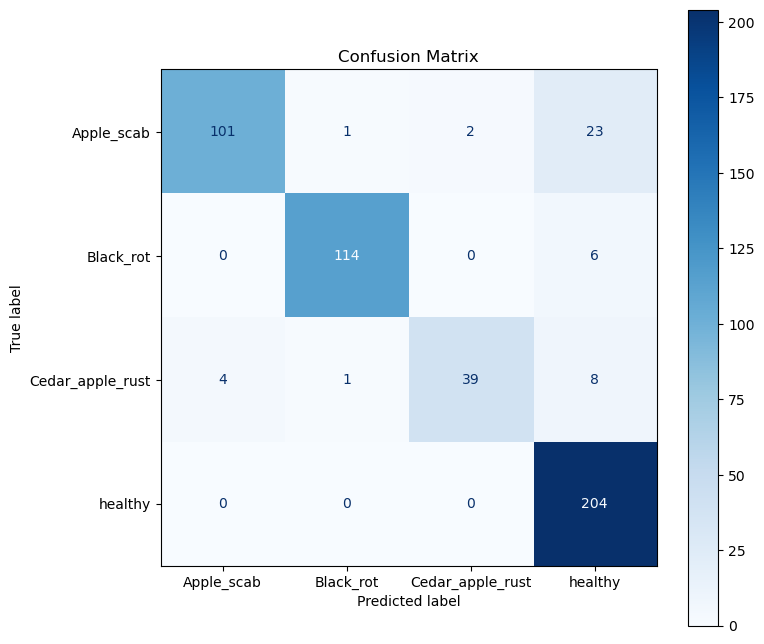

In [34]:
# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)

# Plot the confusion matrix
fig, ax = plt.subplots(figsize=(8, 8))
disp.plot(cmap='Blues', values_format='d', ax=ax, colorbar=True)
plt.grid(False)  # Remove grid lines
plt.title("Confusion Matrix")
plt.show()

In [35]:
# Print a classification report
print(classification_report(test_labels, pred_labels, target_names=class_names))

                  precision    recall  f1-score   support

      Apple_scab       0.96      0.80      0.87       127
       Black_rot       0.98      0.95      0.97       120
Cedar_apple_rust       0.95      0.75      0.84        52
         healthy       0.85      1.00      0.92       204

        accuracy                           0.91       503
       macro avg       0.94      0.87      0.90       503
    weighted avg       0.92      0.91      0.91       503



# Define EfficientNet Model Trainable Base and a Learning Rate Scheduler Callback

In [36]:
from tensorflow.keras.callbacks import LearningRateScheduler
import math

In [37]:
# Load the EfficientNetB0 architecture with pre-trained ImageNet weights
base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the base model's layers to prevent training them initially
base_model.trainable = True

# Add custom layers for multi-class classification
x = base_model.output
x = GlobalAveragePooling2D()(x)  # Global average pooling layer
x = Dense(128, activation='relu')(x)  # Fully connected layer
x = Dropout(0.5)(x)  # Dropout layer for regularization
output = Dense(4, activation='softmax')(x)  # Output layer with 4 neurons for multi-class classification

# Create the final model
model = Model(inputs=base_model.input, outputs=output)

# Define a learning rate scheduler
initial_lr = 0.001
def lr_schedule(epoch):
    return initial_lr * math.exp(-0.1 * epoch)

lr_scheduler = LearningRateScheduler(lr_schedule)

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.00001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Display the model architecture
model.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)    │ (None, 224, 224, 3)       │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ rescaling_4 (Rescaling)       │ (None, 224, 224, 3)       │               0 │ input_layer_2[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ normalization_2               │ (None, 224, 224, 3)       │               7 │ rescaling_4[0][0]          │
│ (Normalization)               │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ rescaling_5 (Rescaling)       │ (None, 224, 224, 3)       │               0 │ normalization_2[0][0]      │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ stem_conv_pad (ZeroPadding2D) │ (None, 225, 225, 3)       │               0 │ rescaling_5[0][0]          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ stem_conv (Conv2D)            │ (None, 112, 112, 32)      │             864 │ stem_conv_pad[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ stem_bn (BatchNormalization)  │ (None, 112, 112, 32)      │             128 │ stem_conv[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ stem_activation (Activation)  │ (None, 112, 112, 32)      │               0 │ stem_bn[0][0]              │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block1a_dwconv                │ (None, 112, 112, 32)      │             288 │ stem_activation[0][0]      │
│ (DepthwiseConv2D)             │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block1a_bn                    │ (None, 112, 112, 32)      │             128 │ block1a_dwconv[0][0]       │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block1a_activation            │ (None, 112, 112, 32)      │               0 │ block1a_bn[0][0]           │
│ (Activation)                  │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block1a_se_squeeze            │ (None, 32)                │               0 │ block1a_activation[0][0]   │
│ (GlobalAveragePooling2D)      │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block1a_se_reshape (Reshape)  │ (None, 1, 1, 32)          │               0 │ block1a_se_squeeze[0][0]   │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block1a_se_reduce (Conv2D)    │ (None, 1, 1, 8)           │             264 │ block1a_se_reshape[0][0]   │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block1a_se_expand (Conv2D)    │ (None, 1, 1, 32)          │             28

 Total params: 4,214,055 (16.08 MB)

 Trainable params: 4,172,032 (15.92 MB)

 Non-trainable params: 42,023 (164.16 KB)

# Train the Model using Learning Rate Schedular Callback

In [38]:
# Train the model
history = model.fit(train_images, train_labels, epochs=50, callbacks=[lr_scheduler], validation_data=(test_images, test_labels), batch_size=32)

Epoch 1/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 97s 1s/step - accuracy: 0.8160 - loss: 0.4806 - val_accuracy: 0.2525 - val_loss: 1.8872 - learning_rate: 0.0010
Epoch 2/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 67s 1s/step - accuracy: 0.9832 - loss: 0.0578 - val_accuracy: 0.1034 - val_loss: 1.8195 - learning_rate: 9.0484e-04
Epoch 3/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 67s 1s/step - accuracy: 0.9815 - loss: 0.0550 - val_accuracy: 0.2525 - val_loss: 2.1621 - learning_rate: 8.1873e-04
Epoch 4/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 69s 1s/step - accuracy: 0.9942 - loss: 0.0261 - val_accuracy: 0.2525 - val_loss: 2.1201 - learning_rate: 7.4082e-04
Epoch 5/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 69s 1s/step - accuracy: 0.9940 - loss: 0.0245 - val_accuracy: 0.2525 - val_loss: 2.4077 - learning_rate: 6.7032e-04
Epoch 6/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 70s 1s/step - accuracy: 0.9989 - loss: 0.0082 - val_accuracy: 0.2525 - val_loss: 2.4097 - learning_rate: 6.0653e-04
Epoch 7/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 69s 1s/step - accuracy: 0.9998 - loss: 0.0

# Evaluate the Model

In [39]:
# Evaluate the model
test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print(f'Test Loss: {test_loss:.4f}')
print(f'Test Accuracy: {test_accuracy:.4f}')

16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 187ms/step - accuracy: 1.0000 - loss: 6.4298e-04
Test Loss: 0.0006
Test Accuracy: 1.0000


In [40]:
# Predict the labels on the test set
pred_labels = np.argmax(model.predict(test_images), axis=1)# Predict the labels on the test set
pred_labels = np.argmax(model.predict(test_images), axis=1)

16/16 ━━━━━━━━━━━━━━━━━━━━ 7s 283ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 191ms/step


In [41]:
# Calculate the confusion matrix
cm = confusion_matrix(test_labels, pred_labels)

# Define the class names
class_names = ['Apple_scab', 'Black_rot', 'Cedar_apple_rust', 'healthy']

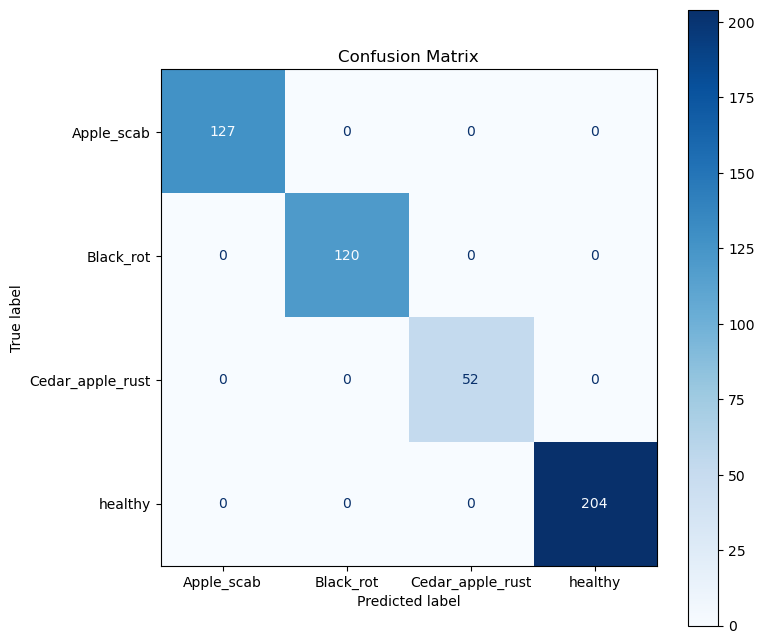

In [42]:
# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)

# Plot the confusion matrix
fig, ax = plt.subplots(figsize=(8, 8))
disp.plot(cmap='Blues', values_format='d', ax=ax, colorbar=True)
plt.grid(False)  # Remove grid lines
plt.title("Confusion Matrix")
plt.show()